In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Датасет 1 (cars)

In [25]:
data = pd.read_csv('data/cars.csv')
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [26]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Очистка

In [27]:
# очистка от пропусков
data = data.dropna()
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [28]:
# удаление дубликатов
data = data.drop_duplicates()

# Анализ

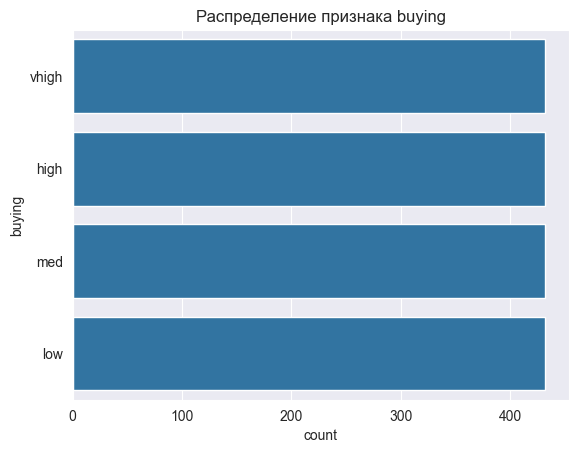

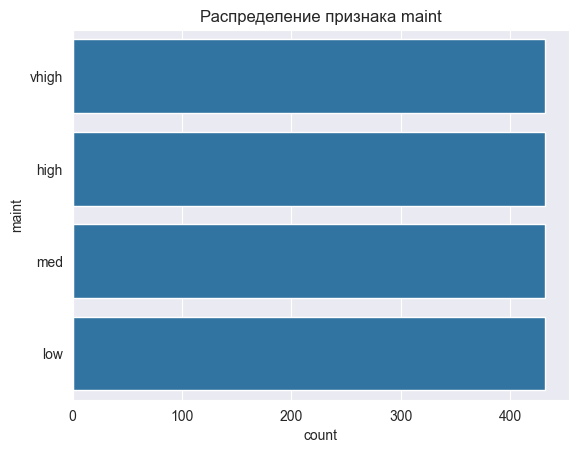

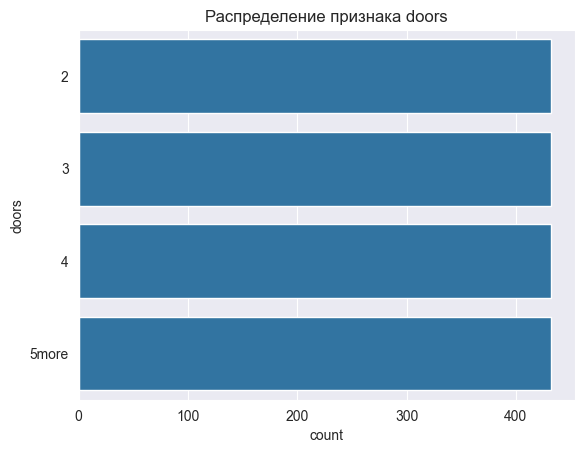

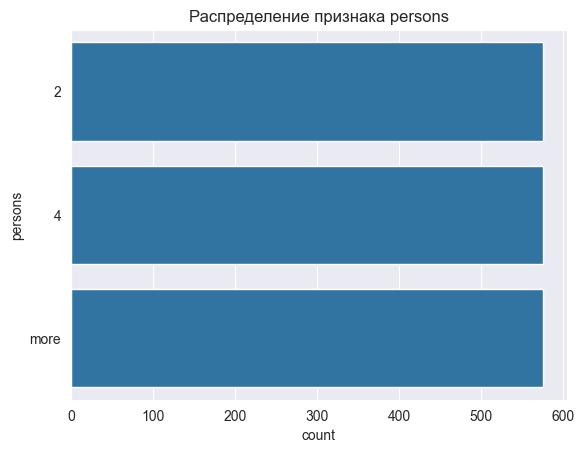

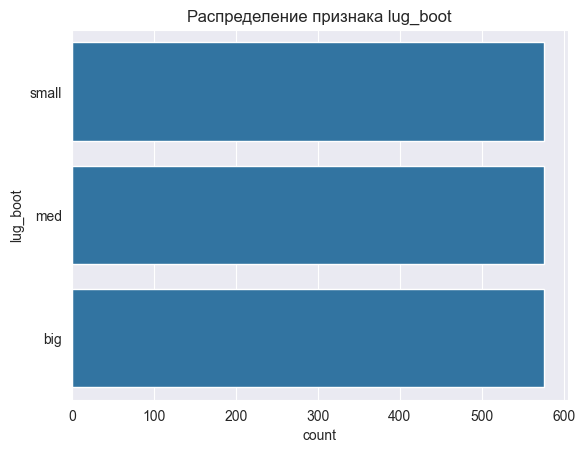

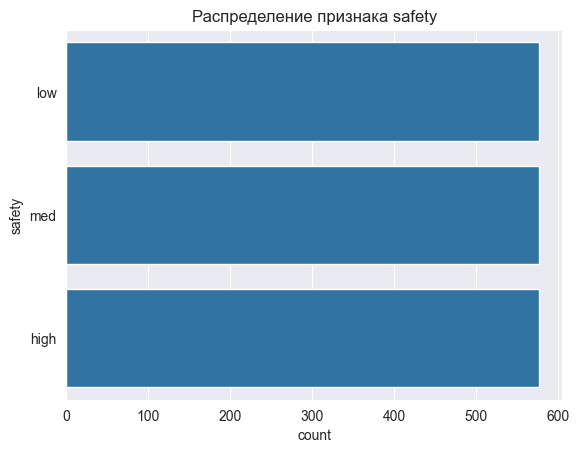

In [29]:
for column in data.columns[:-1]:
    sns.countplot(data[column])
    plt.title(f"Распределение признака {column}")
    plt.show()

Видно, что все признаки распределены равномерно

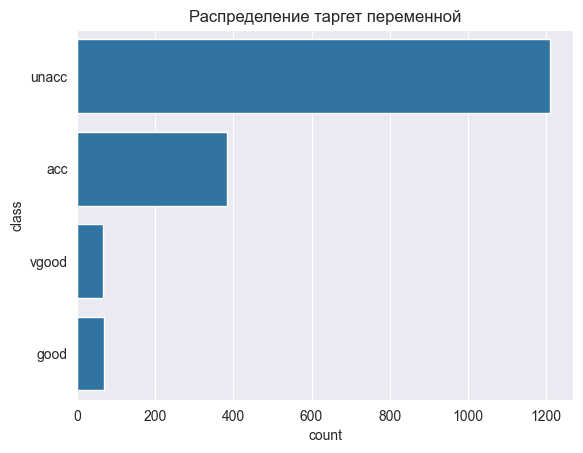

In [30]:
sns.countplot(data['class'])
plt.title(f"Распределение таргет переменной")
plt.show()

In [31]:
# объединим классы acceptable, very good и good в один класс — acceptable

data['class'] = data['class'].replace(['acc', 'vgood', 'good'], 'acceptable')
data['class'].describe()

count      1728
unique        2
top       unacc
freq       1210
Name: class, dtype: object

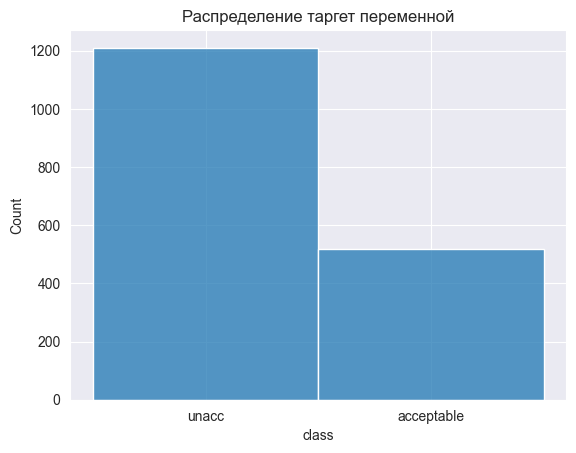

In [32]:
sns.histplot(data['class'], bins=10)
plt.title(f"Распределение таргет переменной")
plt.show()

In [33]:
# кодирование категориальных признаков
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,1
1,3,3,0,0,2,2,1
2,3,3,0,0,2,0,1
3,3,3,0,0,1,1,1
4,3,3,0,0,1,2,1


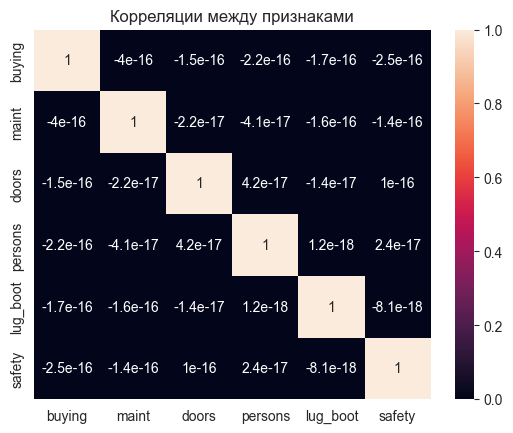

In [34]:
# корреляция
correlation_matrix = data.drop(columns=['class']).corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title("Корреляции между признаками")
plt.show()

Видно, что корреляций нет

# Обучение

In [35]:
# разделим на тестовую и обучающую выборки и закодируем текст как вектор

X = data.drop(columns=['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,3,3,3,2,0,0
901,2,3,1,1,2,2
1709,1,1,3,0,0,0
706,0,2,2,0,1,2
678,0,2,1,0,1,1


In [37]:
y_train.head()

107     1
901     1
1709    1
706     1
678     1
Name: class, dtype: int64

In [38]:
# классификаторы
logistic_regression_cls = LogisticRegression(random_state=42)
decision_tree_cls = DecisionTreeClassifier(random_state=42)

# обучение модели
logistic_regression_cls.fit(X_train, y_train)
decision_tree_cls.fit(X_train, y_train)

None

In [39]:
# предсказание результатов
y_pred_log = logistic_regression_cls.predict(X_test)
y_pred_tree = decision_tree_cls.predict(X_test)

y_pred_proba_log = logistic_regression_cls.predict_proba(X_test)[:, 1]
y_pred_proba_tree = decision_tree_cls.predict_proba(X_test)[:, 1]

# Результаты

In [40]:
# precision, recall, f1
print("Метрики для логистической регрессия:")
print(classification_report(y_test, y_pred_log))

Метрики для логистической регрессия:
              precision    recall  f1-score   support

           0       0.59      0.37      0.46       111
           1       0.75      0.88      0.81       235

    accuracy                           0.72       346
   macro avg       0.67      0.63      0.63       346
weighted avg       0.70      0.72      0.70       346



In [41]:
# precision, recall, f1
print("Метрики для дерева решений:")
print(classification_report(y_test, y_pred_tree))

Метрики для дерева решений:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       111
           1       0.98      1.00      0.99       235

    accuracy                           0.99       346
   macro avg       0.99      0.98      0.99       346
weighted avg       0.99      0.99      0.99       346



In [42]:
def show_confusion_matrix(y_pred, title: str):
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d')
    plt.title(title)
    plt.show()

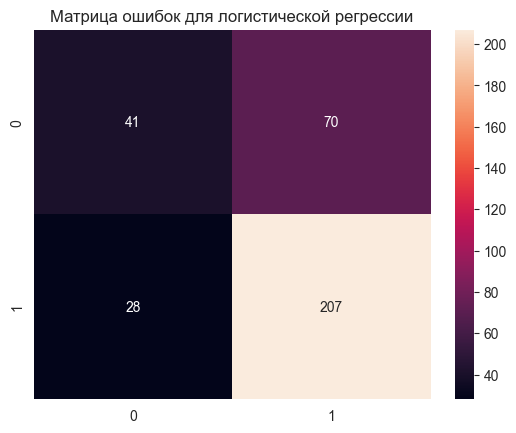

In [43]:
show_confusion_matrix(y_pred_log, "Матрица ошибок для логистической регрессии")

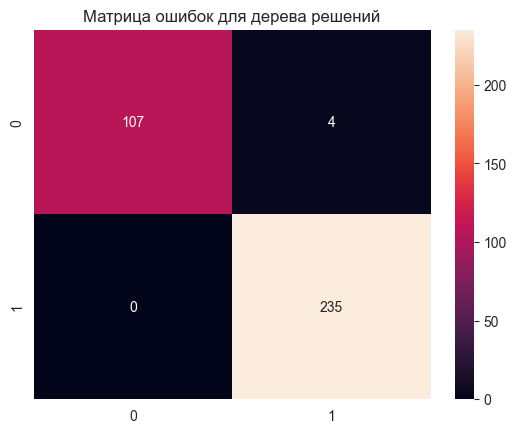

In [44]:
show_confusion_matrix(y_pred_tree, "Матрица ошибок для дерева решений")

In [45]:
fpr_log, tpr_log, _ = roc_curve(y_test, logistic_regression_cls.predict_proba(X_test)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, decision_tree_cls.predict_proba(X_test)[:, 1])

roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

print(f"Логистическая регрессия: ROC AUC = {roc_auc_log:.4f}")
print(f"Дерево решений: ROC AUC = {roc_auc_tree:.4f}")

Логистическая регрессия: ROC AUC = 0.7782
Дерево решений: ROC AUC = 0.9820


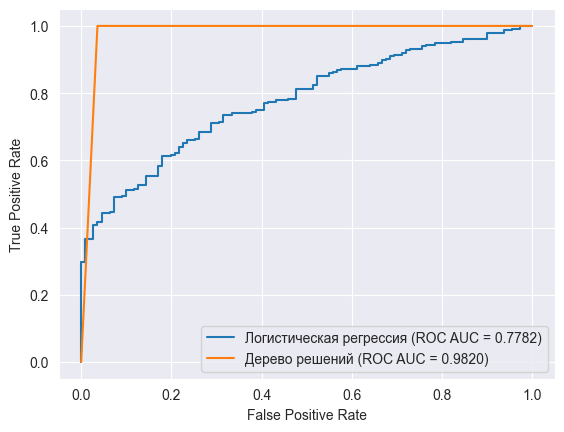

In [46]:
plt.plot(fpr_log, tpr_log, label=f"Логистическая регрессия (ROC AUC = {auc(fpr_log, tpr_log):.4f})")
plt.plot(fpr_tree, tpr_tree, label=f"Дерево решений (ROC AUC = {auc(fpr_tree, tpr_tree):.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Выводы

В даннной задаче логистическая регрессия показала себя значительно хуже, чем дерево решений. ROC-AUC для дерева решений составил 0.9820, а для лог. регрессии всего 0.77

Для дерева решений f1 скор = 0.98, что показывает на хороший баланс между precision и recall (как и сами этим 2 метрики хорошие). На смаом деле похоже на то, что модель переобучилась (насколько я знаю дерево решений имеет к этому склонность).